# Breast Histopathology IDC Classification

## Import dependencies

In [32]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split


import os
import shutil

In [2]:
tf.__version__

'2.1.0'

## Imoprt data

In [4]:
# Creating a new directory to store all available images
all_images_dir = 'all_images_dir'
os.mkdir(all_images_dir)

# Create Positive subdirectory within all images
os.mkdir('all_images_dir/1')
os.mkdir('all_images_dir/0')

In [5]:
os.chdir('./data')

In [6]:
cur_dir = os.getcwd()

In [7]:
patient_list = os.listdir(cur_dir)

In [8]:
len(patient_list)

280

## Copying data into a single directory

In [ ]:

for patient in patient_list:
  
  try:
    
    path_0 = str(patient) + '/0'
    path_1 = str(patient) + '/1'

    # create a list of all files in folder 0
    file_list_0 = os.listdir(path_0)
    # create a list of list all file in folder 1
    file_list_1 = os.listdir(path_1)

    # move the 0 images to all_images_dir
    for fname in file_list_0:
        # source path to image
        src = os.path.join('/Users/dastan/Projects/Breast-Histopathology-Classification/data/',path_0, fname)
        # destination path to image
        dst = os.path.join('/Users/dastan/Projects/Breast-Histopathology-Classification/',all_images_dir, '0', fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

    # move the 1 images to all_images_dir
    for fname in file_list_1:
        # source path to image
        src = os.path.join('/Users/dastan/Projects/Breast-Histopathology-Classification/data/', path_1, fname)
        # destination path to image
        dst = os.path.join('/Users/dastan/Projects/Breast-Histopathology-Classification/', all_images_dir, '1', fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)
        
  except:
     print(patient, 'cannot be copied into proper folder')

In [23]:
# Check the count of images are in each folder

os.chdir('/Users/dastan/Projects/Breast-Histopathology-Classification/')
print('Total:', len(os.listdir('all_images_dir/1'))+len(os.listdir('all_images_dir/0')))
print('Positive:', len(os.listdir('all_images_dir/1')))
print('Negative:', len(os.listdir('all_images_dir/0')))

Total: 277524
Positive: 78786
Negative: 198738


## Creating a dataframe from images

In [27]:
# Create a dataframe containing all the information

image_list_1 = os.listdir('all_images_dir/1')
df_data_1 = pd.DataFrame(image_list_1, columns=['image_id'])

image_list_0 = os.listdir('all_images_dir/0')
df_data_0 = pd.DataFrame(image_list_0, columns=['image_id'])

df_data = pd.concat([df_data_1, df_data_0])

In [28]:
df_data.head()

,image_id
0,10286_idx5_x1251_y351_class1.png
1,10269_idx5_x1351_y651_class1.png
2,10307_idx5_x1351_y1801_class1.png
3,12910_idx5_x1001_y851_class1.png
4,12880_idx5_x1151_y2201_class1.png


In [29]:
# adding the target(label) column
def extract_target(x):
    # split into a list
    a = x.split('_')
    # the target is part of the string in index 4
    b = a[4]
    # the ytarget i.e. 1 or 2 is the 5th index of the string --> class1
    target = b[5]
    
    return target

# create a new column called 'target'
df_data['target'] = df_data['image_id'].apply(extract_target)

df_data.head()

,image_id,target
0,10286_idx5_x1251_y351_class1.png,1
1,10269_idx5_x1351_y651_class1.png,1
2,10307_idx5_x1351_y1801_class1.png,1
3,12910_idx5_x1001_y851_class1.png,1
4,12880_idx5_x1151_y2201_class1.png,1


Text(0.5, 1.0, 'Class Distributions')

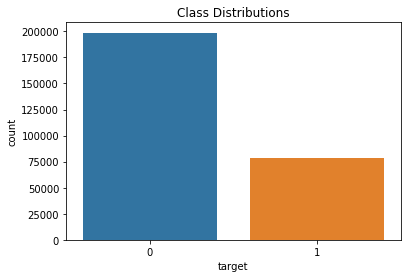

In [31]:
sns.countplot(df_data['target']).set_title('Class Distributions')

## Splitting the data into test and train

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    df_data, df_data['target'], test_size=0.33, random_state=42, stratify=df_data['target'])

print('Train set:', X_train.shape[0])
print('Test set:', X_test.shape[0])
X_train.head()

Train set: 185941
Test set: 91583


,image_id,target
71888,9029_idx5_x2251_y1001_class1.png,1
111297,8956_idx5_x2701_y501_class0.png,0
167951,12910_idx5_x2601_y751_class0.png,0
169591,12931_idx5_x901_y701_class0.png,0
69406,12752_idx5_x2701_y1301_class1.png,1


Text(0.5, 1.0, 'Train dataset class Distributions')

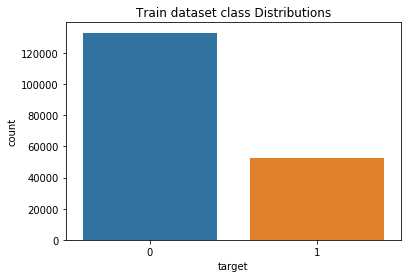

In [44]:
sns.countplot(X_train['target']).set_title('Train dataset class Distributions')

Text(0.5, 1.0, 'Train dataset class Distributions')

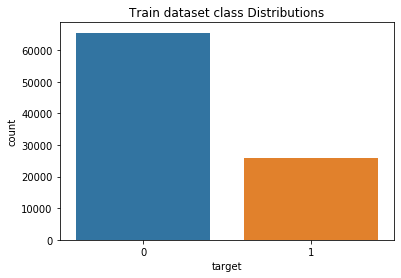

In [45]:
sns.countplot(X_test['target']).set_title('Train dataset class Distributions')

In [47]:
X_train.shape

(185941, 2)

In [ ]:
Architecture of CNN loading..